In [229]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [230]:
# Loading in the csv file as a dataframe, making a copy of it, and previewing the first 5 rows
df = pd.read_csv('admit.csv')
original = df.copy()

df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [231]:
# Checking the shape, data types, and count of non-null and duplicated columns 
print(f'There are {df.duplicated().sum()} duplicate rows in the dataframe\n')
df.info()

# The dataframe contains 5 duplicate rows
# dataframe shape is [400 x 4]
# All numeric data types with 'gpa' being a float64, and the rest being of type int64
# No null columns

There are 5 duplicate rows in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [232]:
# Inspecting the duplicate rows
df[df.duplicated()]

# Since the dataset does not have an explicit index related to 'submission_id' or any other unique identifier for each applicant, 
#    and there is no variable specifically serving that purpose, we can reasonably assume the duplicates appear due to chance. 
#    Therefore, we will keep the duplicate rows, rather than dropping them.

,admit,gre,gpa,rank
59,0,600,2.82,4
77,1,800,4.00,3
202,1,700,4.00,1
263,1,620,3.95,3
398,0,700,3.65,2


In [233]:
# Observing summary statistics for the variables
df.describe().round(2)

,admit,gre,gpa,rank
count,400.00,400.00,400.00,400.00
mean,0.32,587.70,3.39,2.48
std,0.47,115.52,0.38,0.94
min,0.00,220.00,2.26,1.00
25%,0.00,520.00,3.13,2.00
50%,0.00,580.00,3.40,2.00
75%,1.00,660.00,3.67,3.00
max,1.00,800.00,4.00,4.00


In [234]:
# Question 1: Checking for class balance of the dependent variable 'admit'
admit_counts = df['admit'].value_counts()
admit_props = df['admit'].value_counts(normalize = True).round(3)

pd.merge(admit_counts, admit_props, on = 'admit').reset_index()

# The classes are not balanced. About 68% of the observations were not admitted

,admit,count,proportion
0,0,273,0.682
1,1,127,0.318


Skewness of GRE scores: -0.14



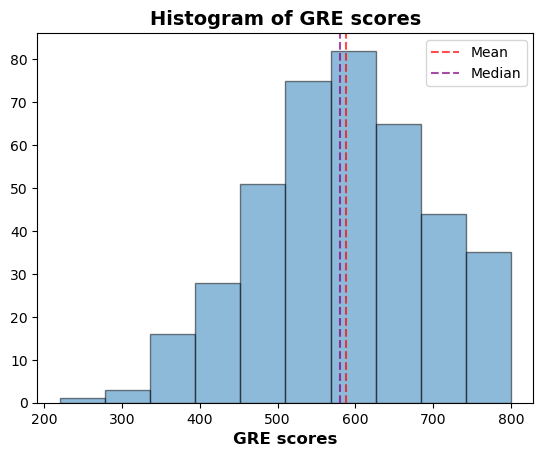

In [235]:
# Question 2: Examining the distribution and the skew of GRE scores
print(f"Skewness of GRE scores: {round(skew(df['gre']), 2)}\n")

plt.hist(df['gre'], edgecolor = 'black', alpha = .5)
plt.title('Histogram of GRE scores', fontsize = 14, weight = 'bold')
plt.xlabel('GRE scores', fontsize = 12, weight = 'bold')
plt.axvline(df['gre'].mean(), linestyle = '--', color = 'red', alpha = .7, label = 'Mean')
plt.axvline(df['gre'].median(), linestyle = '--', color = 'purple', alpha = .7, label = 'Median')
plt.legend()
plt.show()

# The distribution of GRE scores is approximately symmetric, with a very slight left skew caused by a few lower outliers. 
#     However, the mean and median are close, indicating near-normality

Skewness of GPA: -0.21



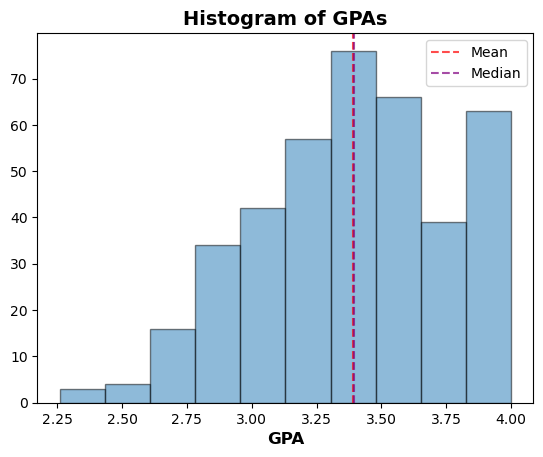

In [236]:
# Examining the distribution and the skew of GPAs
print(f"Skewness of GPA: {round(skew(df['gpa']), 2)}\n")

plt.hist(df['gpa'], edgecolor = 'black', alpha = .5)
plt.title('Histogram of GPAs', fontsize = 14, weight = 'bold')
plt.xlabel('GPA', fontsize = 12, weight = 'bold')
plt.axvline(df['gpa'].mean(), linestyle = '--', color = 'red', alpha = .7, label = 'Mean')
plt.axvline(df['gpa'].median(), linestyle = '--', color = 'purple', alpha = .7, label = 'Median')
plt.legend()
plt.show()

# Similar to GRE scores, the distribution of GPAs is approximately normal, although it still contains a few lower outliers

In [237]:
# Observing the value counts of university rankings
df.value_counts('rank').reset_index()

# Most applicant's schools rank either 2 or 3

,rank,count
0,2,151
1,3,121
2,4,67
3,1,61


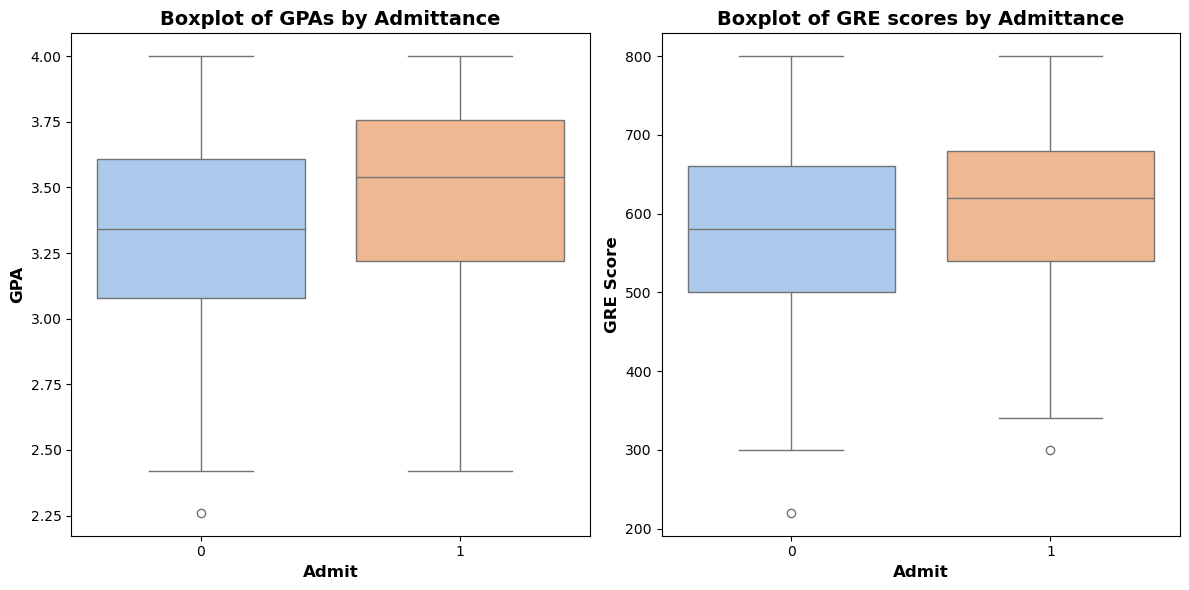

In [238]:
# Visualizing the differences in GRE scores and GPAs for applicants who were admitted (1) or not (0) using boxplots 
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

sns.boxplot(data = df, x = 'admit', y = 'gpa', hue = 'admit', palette = 'pastel', legend = False, ax = ax[0])
ax[0].set_title('Boxplot of GPAs by Admittance', fontsize = 14, weight = 'bold')
ax[0].set_ylabel('GPA', fontsize = 12, weight = 'bold')
ax[0].set_xlabel('Admit', fontsize = 12, weight = 'bold')

sns.boxplot(data = df, x = 'admit', y = 'gre', hue = 'admit', palette = 'pastel', legend = False, ax = ax[1])
ax[1].set_title('Boxplot of GRE scores by Admittance', fontsize = 14, weight = 'bold')
ax[1].set_ylabel('GRE Score', fontsize = 12, weight = 'bold')
ax[1].set_xlabel('Admit', fontsize = 12, weight = 'bold')

plt.tight_layout()
plt.show()

# As expected, both GRE scores and GPAs are typically higher for those that were admitted vs. not admitted

In [239]:
# Presenting summary statistics for applicant's undergraduate university rankings, grouped by their admittance result
df.groupby('admit')['rank'].describe().round(1).reset_index()

# Those who were accepted had on average a university rank of 2.1, while those who weren't accepted had an average rank of 2.6

,admit,count,mean,std,min,25%,50%,75%,max
0,0,273.0,2.6,0.9,1.0,2.0,3.0,3.0,4.0
1,1,127.0,2.1,0.9,1.0,1.0,2.0,3.0,4.0


In [240]:
# Defining the independent and dependent variables to use for the regression 
X = sm.add_constant(df.drop(columns = 'admit'))
y = df['admit']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 5)

# Fitting the logistic regression model on the training data and printing the summary
model = sm.Logit(y_train, X_train).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.553801
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Fri, 21 Feb 2025   Pseudo R-squ.:                  0.1143
Time:                        13:49:25   Log-Likelihood:                -155.06
converged:                       True   LL-Null:                       -175.07
Covariance Type:            nonrobust   LLR p-value:                 1.061e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7913      1.387     -2.733      0.006      -6.510      -1.072
gre            0.0031      0.001      2.320      0.020       0.000       0.006
gpa            0.8361      0.398      2.100      0.036       0.056       1.616
rank          -0.6775      0.158     -4.299      0.000      -0.986      -0.369
==============================================================================
"""

# Model Summary Evaluation: 
### Significance of Independent Variables: 
- All three independent variables had $p$-values less than 0.05, indicating that they were statistically significant at the 5% significance level.
- The variable **rank** had the smallest $p$-value, with it being $\approx$ 0.00.<br>
### Most Important Variable: 
- The most influential predictor in the model was **gpa**, as it had the highest absolute value of the coefficient (.836), signaling its strong association with the outcome variable, and it was also statistically significant at the 5% level. <br>
### Model Fit: 
- The overall fit of the model, as indicated by the pseudo $R^2$, was relatively low at around 0.11. This suggests that the model explains only a small portion of the variance in the outcome variable, **admit**. This indicates that there may be other important factors not captured by the current set of predictors, and additional variables could improve the model’s predictive power.

Training Accuracy Score: 0.739
Training Precision Score: 0.682
Training Recall Score: 0.337



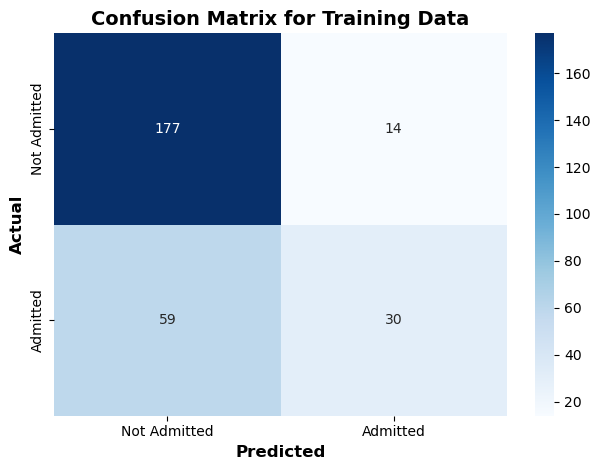

In [242]:
# Getting the predicted probabilities from the training data
y_pred_probs_train = model.predict(X_train)

# Assigning those probabilities to classes of 1 and 0 using a threshold of .5
y_pred_classes_train = np.where(y_pred_probs_train > .5, 1, 0)

# Calculating evaluation metrics and printing them
accuracy_train = accuracy_score(y_train, y_pred_classes_train)

precision_train = precision_score(y_train, y_pred_classes_train)

recall_train = recall_score(y_train, y_pred_classes_train)

conf_matrix_train = confusion_matrix(y_train, y_pred_classes_train)

print(f'Training Accuracy Score: {accuracy_train.round(3)}')
print(f'Training Precision Score: {precision_train.round(3)}')
print(f'Training Recall Score: {recall_train.round(3)}\n')

# Illustrating a confusion matrix of the training data results
sns.heatmap(conf_matrix_train, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Not Admitted', 'Admitted'], yticklabels = ['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix for Training Data', fontsize = 14, weight = 'bold')
plt.ylabel('Actual', fontsize = 12, weight = 'bold')
plt.xlabel('Predicted', fontsize = 12, weight = 'bold')
plt.tight_layout()
plt.show()

# The model produced a low recall score, indicating that there were a large amount of false negative cases (59) in the training data

Testing Accuracy Score: 0.608
Testing Precision Score: 0.286
Testing Recall Score: 0.158



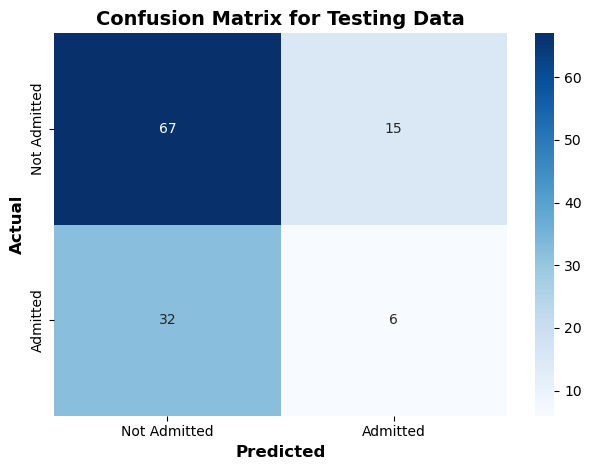

In [243]:
# Getting the predicted probabilities from the testing data
y_pred_probs_test = model.predict(X_test)

# Assigning those probabilities to classes of 1 and 0 using a threshold of .5
y_pred_classes_test = np.where(y_pred_probs_test > .5, 1, 0)

# Calculating evaluation metrics and printing them
accuracy_test = accuracy_score(y_test, y_pred_classes_test)

precision_test = precision_score(y_test, y_pred_classes_test)

recall_test = recall_score(y_test, y_pred_classes_test)

conf_matrix_test = confusion_matrix(y_test, y_pred_classes_test)

print(f'Testing Accuracy Score: {accuracy_test.round(3)}')
print(f'Testing Precision Score: {precision_test.round(3)}')
print(f'Testing Recall Score: {recall_test.round(3)}\n')

# Illustrating a confusion matrix of the testing data results
sns.heatmap(conf_matrix_test, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Not Admitted', 'Admitted'], yticklabels = ['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix for Testing Data', fontsize = 14, weight = 'bold')
plt.ylabel('Actual', fontsize = 12, weight = 'bold')
plt.xlabel('Predicted', fontsize = 12, weight = 'bold')
plt.tight_layout()
plt.show()

# The model produced a low precision and recall score, suggesting that there are a large amount of false positives (15), 
#    and false negatives (32) in the testing data

# Evaluation Metric Summary: 
### Training vs. Testing Data:
- The model performed better on the training data than on the testing data, suggesting that it may have overfitted to the training set. This discrepancy indicates that the model may not generalize well to unseen data. <br>
### Accuracy, Precision, and Recall Scores:
- The accuracy score was higher on the training data (.739) compared to the testing data (.608), highlighting the potential overfitting issue.
- The precision score dropped significantly from .682 on the training data to .286 on the testing data, indicating that the model is incorrectly predicting a large number of positive instances (false positives) in the testing data.
- The recall score was low for both the training (.337) and testing (.158) sets, suggesting that the model is missing a considerable number of true positive cases (false negatives), which points to poor sensitivity.